In [1]:
# =====================================================
#  AIR-AWARE : Nettoyage du dataset de qualité de l’air
# =====================================================

import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt


In [2]:
import pandas as pd

# Lecture avec le bon séparateur et conversion des virgules décimales
df = pd.read_csv(
    "Air-Quality-Dataset.csv",
    sep=";",                # ✅ Séparateur correct
    decimal=",",            # ✅ Pour interpréter les virgules comme des points
    encoding="utf-8"
)

print("✅ Fichier chargé correctement !")
print("Taille du dataset :", df.shape)
df.head()


✅ Fichier chargé correctement !
Taille du dataset : (6200, 10)


,TIME,CO2,"PM2,5",PM10,TEMPERATURE,HUMIDITY,CO2 CATEGORY,"PM2,5 CATEGORY",PM10 CATEGORY,Status
0,2023-01-17T23:15:52+00:00,549,10.0,21.5,17.1,62.30,GOOD,GOOD,GOOD,0
1,2023-01-17T23:16:16+00:00,546,10.0,22.0,17.2,62.31,GOOD,GOOD,GOOD,0
2,2023-01-17T23:16:40+00:00,550,10.0,20.0,17.2,62.32,GOOD,GOOD,GOOD,0
3,2023-01-17T23:17:05+00:00,559,10.0,22.6,16.2,62.33,GOOD,GOOD,GOOD,0
4,2023-01-17T23:17:29+00:00,553,10.0,24.7,13.9,62.34,GOOD,GOOD,GOOD,0


In [9]:
# Informations générales
df.info()

# Statistiques descriptives des colonnes numériques
df.describe().T


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6200 entries, 0 to 6199
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   TIME            6200 non-null   object 
 1   CO2             6200 non-null   int64  
 2   PM2,5           6200 non-null   float64
 3   PM10            6200 non-null   float64
 4   TEMPERATURE     6200 non-null   float64
 5   HUMIDITY        6200 non-null   float64
 6   CO2 CATEGORY    6200 non-null   object 
 7   PM2,5 CATEGORY  6200 non-null   object 
 8   PM10 CATEGORY   6200 non-null   object 
 9   Status          6200 non-null   int64  
dtypes: float64(4), int64(2), object(4)
memory usage: 484.5+ KB


,count,mean,std,min,25%,50%,75%,max
CO2,6200.0,431.563871,207.556254,268.0,378.000000,400.00000,426.000000,3000.000
"PM2,5",6200.0,11.954613,44.290316,-1.0,2.300000,5.80000,7.600000,999.900
PM10,6200.0,25.408113,78.836251,-1.0,5.300000,9.90000,18.600000,1999.900
TEMPERATURE,6200.0,15.861242,0.944260,11.0,15.100000,15.90000,16.400000,21.200
HUMIDITY,6200.0,62.391949,0.186021,62.1,62.240875,62.38095,62.520525,62.999
Status,6200.0,0.098226,0.297644,0.0,0.000000,0.00000,0.000000,1.000


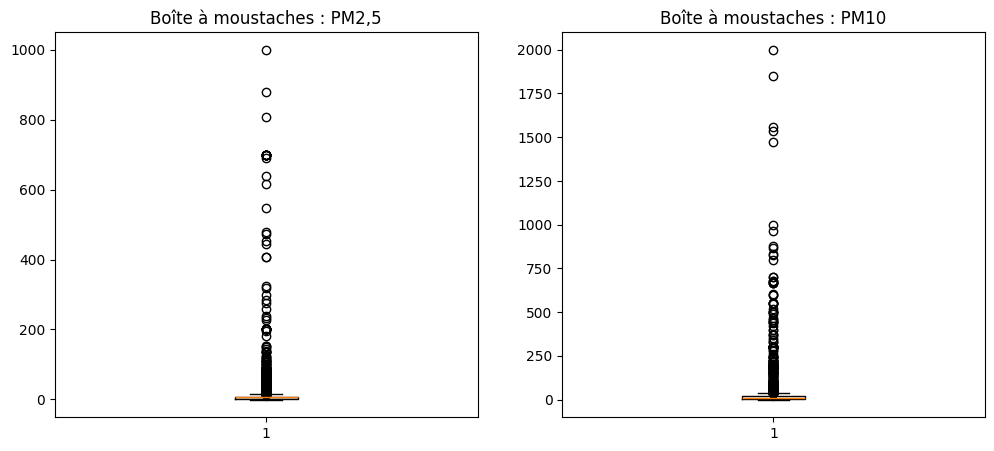

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.boxplot(df['PM2,5'])
plt.title("Boîte à moustaches : PM2,5")

plt.subplot(1,2,2)
plt.boxplot(df['PM10'])
plt.title("Boîte à moustaches : PM10")

plt.show()


In [11]:
# Convertir la colonne TIME en format datetime
df['TIME'] = pd.to_datetime(df['TIME'])

# Mettre TIME comme index (utile pour l'interpolation temporelle)
df = df.set_index('TIME')

# Trier par date
df = df.sort_index()

df.head()


,CO2,"PM2,5",PM10,TEMPERATURE,HUMIDITY,CO2 CATEGORY,"PM2,5 CATEGORY",PM10 CATEGORY,Status
TIME,,,,,,,,,
2023-01-17 23:15:52+00:00,549,10.0,21.5,17.1,62.30,GOOD,GOOD,GOOD,0
2023-01-17 23:16:16+00:00,546,10.0,22.0,17.2,62.31,GOOD,GOOD,GOOD,0
2023-01-17 23:16:40+00:00,550,10.0,20.0,17.2,62.32,GOOD,GOOD,GOOD,0
2023-01-17 23:17:05+00:00,559,10.0,22.6,16.2,62.33,GOOD,GOOD,GOOD,0
2023-01-17 23:17:29+00:00,553,10.0,24.7,13.9,62.34,GOOD,GOOD,GOOD,0


In [13]:
import numpy as np
cols_to_clean = ['CO2', 'PM2,5', 'PM10']

for col in cols_to_clean:
    df.loc[df[col] < 0, col] = np.nan

df[cols_to_clean].describe()


,CO2,"PM2,5",PM10
count,6200.000000,6199.000000,6199.000000
mean,431.563871,11.956703,25.412373
std,207.556254,44.293583,78.841896
min,268.000000,0.200000,0.300000
25%,378.000000,2.300000,5.300000
50%,400.000000,5.800000,9.900000
75%,426.000000,7.600000,18.600000
max,3000.000000,999.900000,1999.900000


In [14]:
df = df.interpolate(method='time')


C:\Users\MSI\AppData\Local\Temp\ipykernel_20280\2572531536.py:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df = df.interpolate(method='time')


In [15]:
df.isna().sum()


CO2               0
PM2,5             0
PM10              0
TEMPERATURE       0
HUMIDITY          0
CO2 CATEGORY      0
PM2,5 CATEGORY    0
PM10 CATEGORY     0
Status            0
dtype: int64

In [16]:
# Calcul des bornes automatiques avec la méthode IQR
for col in ['PM2,5', 'PM10']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    print(f"{col} : Q1={Q1:.2f}, Q3={Q3:.2f}, IQR={IQR:.2f} → Bornes [{lower:.2f}, {upper:.2f}]")


PM2,5 : Q1=2.30, Q3=7.60, IQR=5.30 → Bornes [-5.65, 15.55]
PM10 : Q1=5.30, Q3=18.60, IQR=13.30 → Bornes [-14.65, 38.55]


In [17]:
# Nettoyage selon les bornes calculées
df.loc[(df['PM2,5'] < -5.65) | (df['PM2,5'] > 15.55), 'PM2,5'] = np.nan
df.loc[(df['PM10'] < -14.65) | (df['PM10'] > 38.55), 'PM10'] = np.nan


In [18]:
for col in ['PM2,5', 'PM10']:
    total = len(df)
    missing = df[col].isna().sum()
    print(f"{col} → {missing} valeurs supprimées ({(missing/total)*100:.2f}%)")


PM2,5 → 736 valeurs supprimées (11.87%)
PM10 → 541 valeurs supprimées (8.73%)


In [3]:
# Vérification du tri temporel
df = df.sort_index()
print(df.index.is_monotonic_increasing)

# Vérifier l'espacement entre les timestamps
time_diffs = df.index.to_series().diff().value_counts().head()
print("Top différences temporelles :")
print(time_diffs)


True
Top différences temporelles :
1.0    6199
Name: count, dtype: int64


In [4]:
from sklearn.preprocessing import MinMaxScaler

# On normalise uniquement les variables numériques
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(df[['CO2', 'PM2,5', 'PM10', 'TEMPERATURE', 'HUMIDITY']])

# On recrée un DataFrame normalisé
df_scaled = pd.DataFrame(
    scaled_features,
    columns=['CO2', 'PM2,5', 'PM10', 'TEMPERATURE', 'HUMIDITY'],
    index=df.index
)

df_scaled.head()


,CO2,"PM2,5",PM10,TEMPERATURE,HUMIDITY
0,0.102855,0.01099,0.011245,0.598039,0.222469
1,0.101757,0.01099,0.011495,0.607843,0.233593
2,0.103221,0.01099,0.010495,0.607843,0.244716
3,0.106515,0.01099,0.011795,0.509804,0.255840
4,0.104319,0.01099,0.012844,0.284314,0.266963


In [5]:
# Convertir TIME en datetime si ce n’est pas déjà fait
df['TIME'] = pd.to_datetime(df['TIME'])

# Trier par date (au cas où)
df = df.sort_values(by='TIME')

# Calcul des indices de coupure
train_size = int(len(df) * 0.7)
val_size = int(len(df) * 0.15)

# Division chronologique
train = df.iloc[:train_size]
val = df.iloc[train_size:train_size + val_size]
test = df.iloc[train_size + val_size:]

print("📈 Tailles des ensembles :")
print("Train :", train.shape)
print("Validation :", val.shape)
print("Test :", test.shape)


📈 Tailles des ensembles :
Train : (4340, 10)
Validation : (930, 10)
Test : (930, 10)


In [6]:
# Division du dataset normalisé
train_size = int(len(df_scaled) * 0.7)
val_size = int(len(df_scaled) * 0.15)

train = df_scaled.iloc[:train_size]
val = df_scaled.iloc[train_size:train_size + val_size]
test = df_scaled.iloc[train_size + val_size:]

print("Taille du train :", train.shape)
print("Taille du val   :", val.shape)
print("Taille du test  :", test.shape)


Taille du train : (4340, 5)
Taille du val   : (930, 5)
Taille du test  : (930, 5)


In [7]:
import numpy as np

def create_sequences(data, target_col, n_steps=30):
    """
    Transforme les données en séquences pour LSTM.
    
    data : DataFrame contenant les features normalisées
    target_col : nom de la colonne à prédire (ex: 'CO2')
    n_steps : longueur de la séquence temporelle
    """
    X, y = [], []
    for i in range(len(data) - n_steps):
        X.append(data.iloc[i:i+n_steps].values)
        y.append(data[target_col].iloc[i + n_steps])
    return np.array(X), np.array(y)


In [8]:
# On choisit le nombre de pas de temps
n_steps = 30

# Colonnes utilisées
features = ['CO2', 'PM2,5', 'PM10', 'TEMPERATURE', 'HUMIDITY']

# Création des séquences
X_train, y_train = create_sequences(train[features], target_col='CO2', n_steps=n_steps)
X_val, y_val = create_sequences(val[features], target_col='CO2', n_steps=n_steps)
X_test, y_test = create_sequences(test[features], target_col='CO2', n_steps=n_steps)

print("✅ Séquences prêtes !")
print("X_train :", X_train.shape)
print("y_train :", y_train.shape)
print("X_val   :", X_val.shape)
print("X_test  :", X_test.shape)


✅ Séquences prêtes !
X_train : (4310, 30, 5)
y_train : (4310,)
X_val   : (900, 30, 5)
X_test  : (900, 30, 5)


In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping


In [10]:
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(32, return_sequences=False),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1)  # sortie = prédiction du CO2
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 64)            17920     
                                                                 
 dropout (Dropout)           (None, 30, 64)            0         
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense (Dense)               (None, 16)                528       
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 30,881
Trainable params: 30,881
Non-traina

In [11]:
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,  # s’arrête si pas d’amélioration pendant 5 epochs
    restore_best_weights=True
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=30,          # ⚙️ 30 epochs au lieu de 100
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/30
135/135 [==============================] - 7s 22ms/step - loss: 0.0013 - mae: 0.0174 - val_loss: 0.0031 - val_mae: 0.0234
Epoch 2/30
135/135 [==============================] - 2s 16ms/step - loss: 7.7320e-04 - mae: 0.0130 - val_loss: 0.0019 - val_mae: 0.0131
Epoch 3/30
135/135 [==============================] - 2s 16ms/step - loss: 6.1435e-04 - mae: 0.0114 - val_loss: 0.0016 - val_mae: 0.0135
Epoch 4/30
135/135 [==============================] - 2s 16ms/step - loss: 5.5219e-04 - mae: 0.0097 - val_loss: 0.0018 - val_mae: 0.0137
Epoch 5/30
135/135 [==============================] - 2s 16ms/step - loss: 5.2175e-04 - mae: 0.0093 - val_loss: 0.0012 - val_mae: 0.0083
Epoch 6/30
135/135 [==============================] - 2s 16ms/step - loss: 5.1553e-04 - mae: 0.0094 - val_loss: 0.0011 - val_mae: 0.0140
Epoch 7/30
135/135 [==============================] - 2s 16ms/step - loss: 4.2955e-04 - mae: 0.0087 - val_loss: 0.0025 - val_mae: 0.0143
Epoch 8/30
135/135 [=========================

29/29 [==============================] - 0s 6ms/step - loss: 6.3080e-04 - mae: 0.0075
✅ Test Loss (MSE): 0.00063
✅ Test MAE: 0.00747


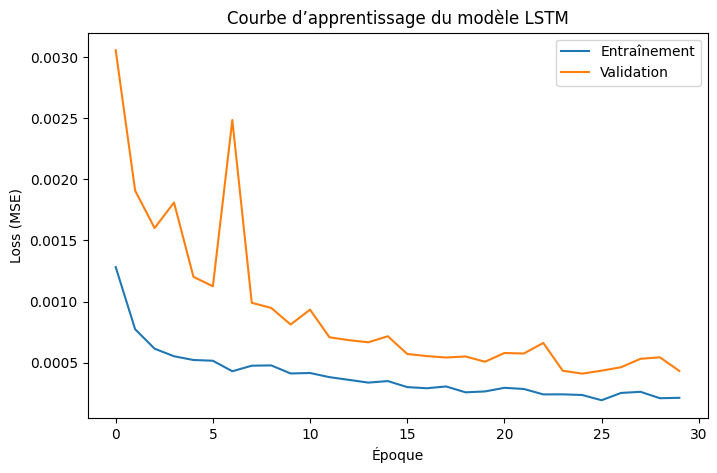

In [12]:
# Évaluation sur le test set
loss, mae = model.evaluate(X_test, y_test)
print(f"✅ Test Loss (MSE): {loss:.5f}")
print(f"✅ Test MAE: {mae:.5f}")

# Courbe d'apprentissage
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Entraînement')
plt.plot(history.history['val_loss'], label='Validation')
plt.xlabel('Époque')
plt.ylabel('Loss (MSE)')
plt.title('Courbe d’apprentissage du modèle LSTM')
plt.legend()
plt.show()


In [14]:
# Sauvegarde du modèle entraîné
model.save("lstm_air_quality.h5")
print("✅ Modèle LSTM sauvegardé sous 'lstm_air_quality.h5'")


✅ Modèle LSTM sauvegardé sous 'lstm_air_quality.h5'


In [15]:
# Faire les prédictions sur le jeu de test
y_pred = model.predict(X_test)

# Conversion en DataFrame pour mieux visualiser
import pandas as pd

results = pd.DataFrame({
    'CO2_reel': y_test.flatten(),
    'CO2_pred': y_pred.flatten()
})

results.head(10)


29/29 [==============================] - 0s 5ms/step


,CO2_reel,CO2_pred
0,0.047950,0.050915
1,0.047950,0.050513
2,0.047950,0.050211
3,0.047950,0.050133
4,0.047584,0.050162
5,0.047950,0.049993
6,0.050146,0.050081
7,0.047950,0.051441
8,0.050146,0.051091
9,0.050146,0.051836


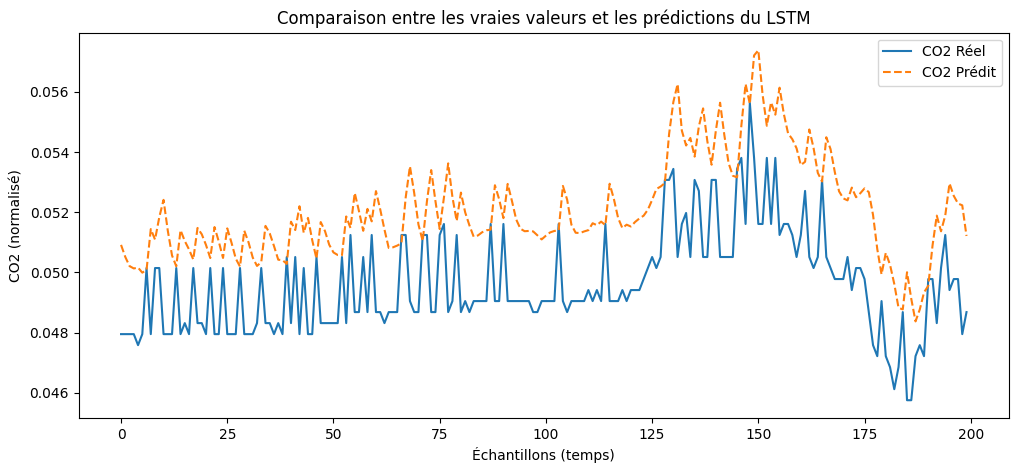

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(results['CO2_reel'][:200], label='CO2 Réel')
plt.plot(results['CO2_pred'][:200], label='CO2 Prédit', linestyle='dashed')
plt.title("Comparaison entre les vraies valeurs et les prédictions du LSTM")
plt.xlabel("Échantillons (temps)")
plt.ylabel("CO2 (normalisé)")
plt.legend()
plt.show()


In [17]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"✅ MSE : {mse:.6f}")
print(f"✅ MAE : {mae:.6f}")
print(f"✅ R² Score : {r2:.4f}")


✅ MSE : 0.000631
✅ MAE : 0.007466
✅ R² Score : 0.9512
